Link to dataset - https://data.mendeley.com/datasets/wj9rwkp9c2/1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('IraqDiabetes.csv')
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
print(df['CLASS'].unique())
print(df['Gender'].unique())

['N' 'N ' 'P' 'Y' 'Y ']
['F' 'M' 'f']


In [ ]:
df.loc[:, 'CLASS'] = df['CLASS'].str.strip()
df.loc[:, 'Gender'] = df['Gender'].str.replace('f', 'F')
print(df['CLASS'].unique())
print(df['Gender'].unique())

['N' 'P' 'Y']
['F' 'M']


<ipython-input-22-2ab0af418701>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map = df.corr()


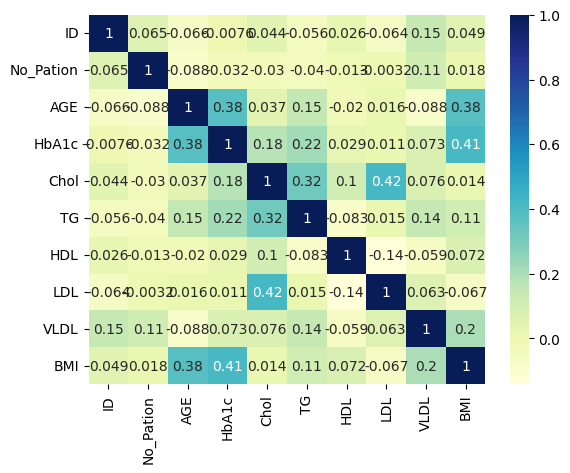

In [ ]:
map = df.corr()
sn.heatmap(map, cmap='YlGnBu', annot=True)
plt.show()

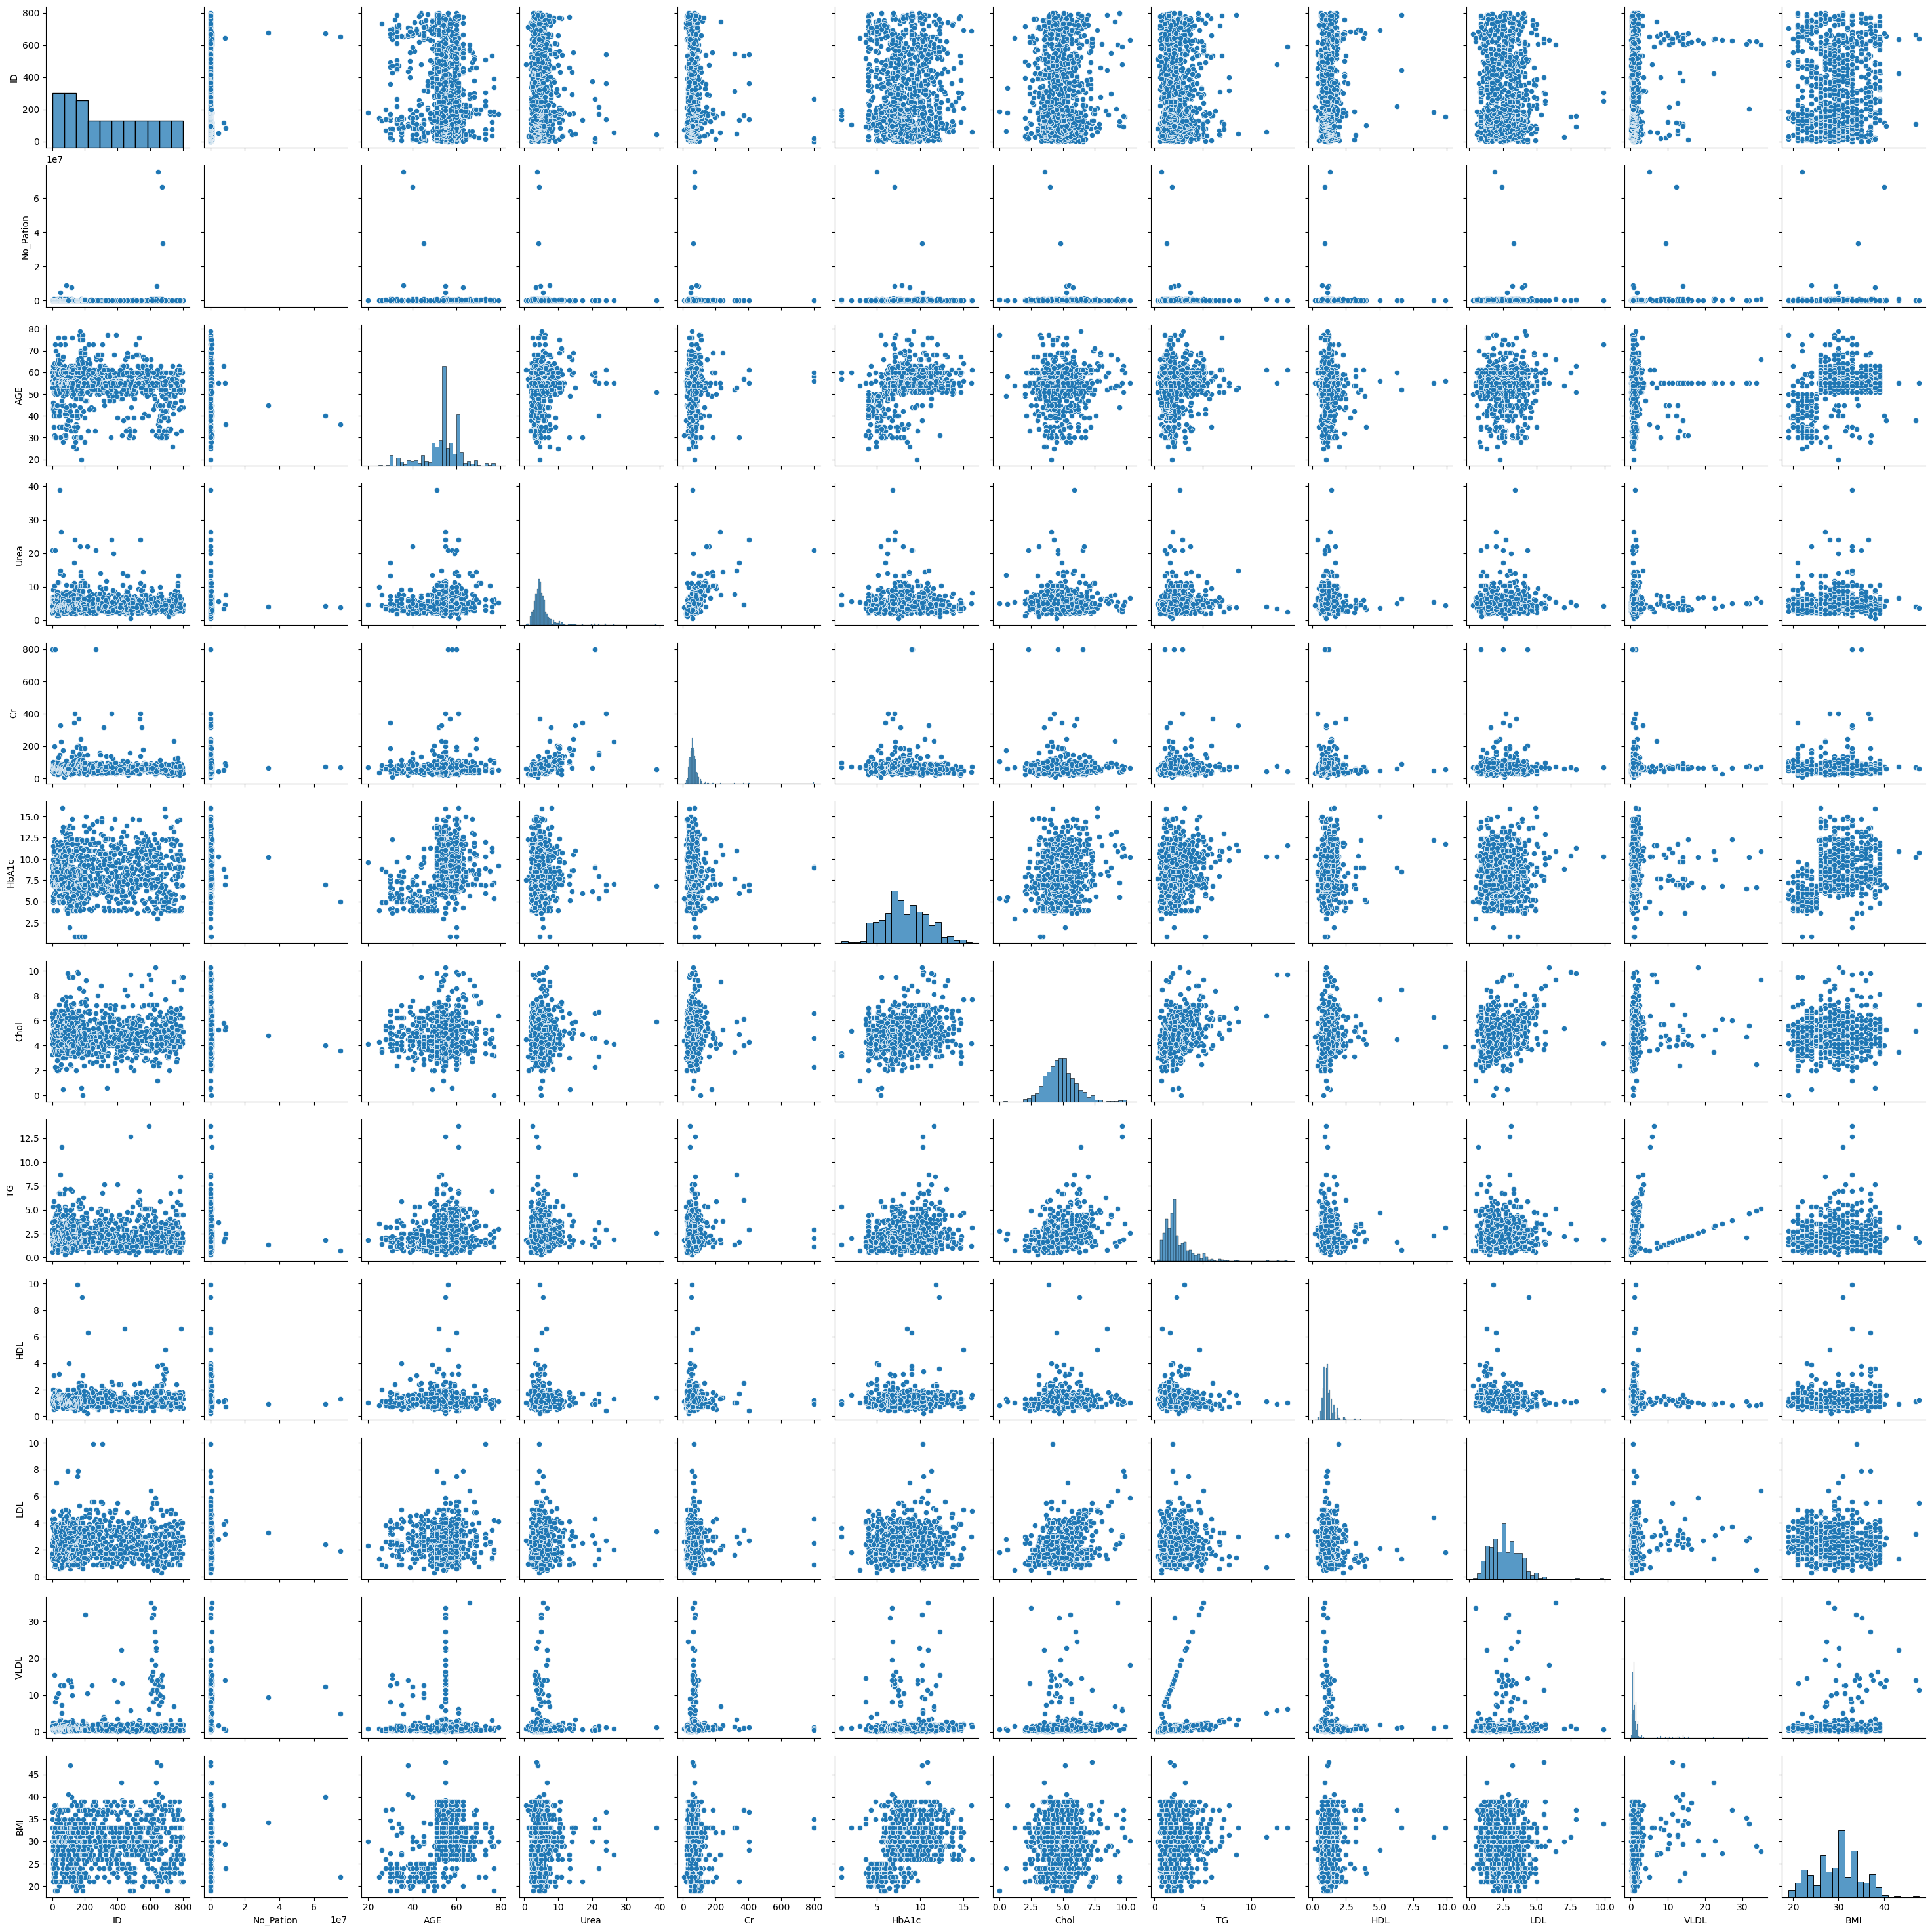

In [ ]:
sn.pairplot(df)

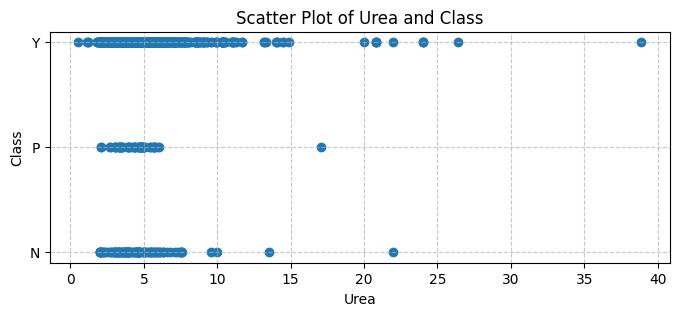

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(df['Urea'], df['CLASS'])
plt.title('Scatter Plot of Urea and Class')
plt.xlabel('Urea')
plt.ylabel('Class')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

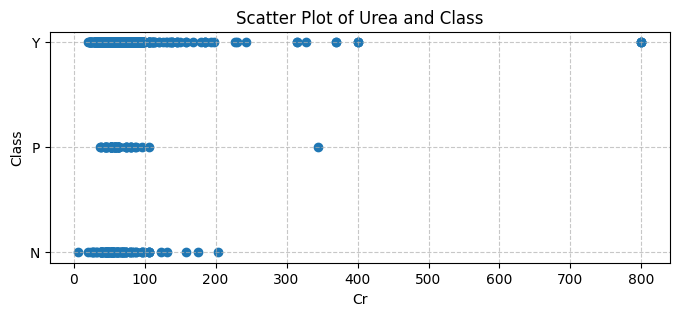

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(df['Cr'], df['CLASS'])
plt.title('Scatter Plot of Urea and Class')
plt.xlabel('Cr')
plt.ylabel('Class')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.drop(['Urea', 'Cr'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

# Continuous Bar Chart of Gender Distribution by Class

M    565
F    435
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='Count'>

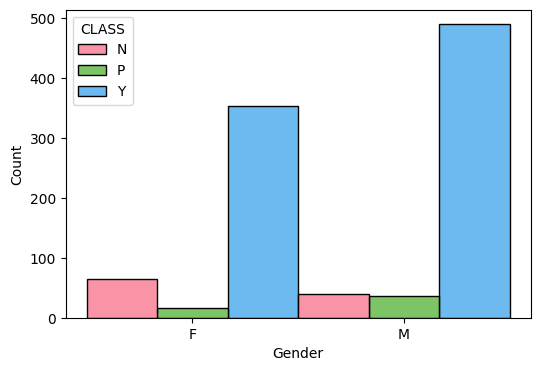

In [ ]:
print(df['Gender'].value_counts())
plt.figure(figsize=(6, 4))
sn.set_palette(sn.color_palette(['#20639B', '#ED553B']))
sn.histplot(data = df, x = 'Gender', hue = 'CLASS', bins = 40, multiple = 'dodge')

In our dataset, males are more prone to diabetes

# Stacked Bar Chart of Age Distribution by Class

<Axes: xlabel='CLASS'>

<Figure size 640x480 with 0 Axes>

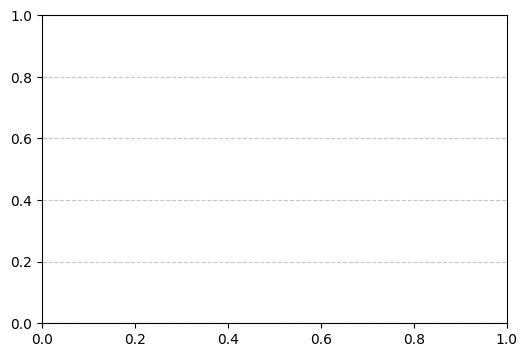

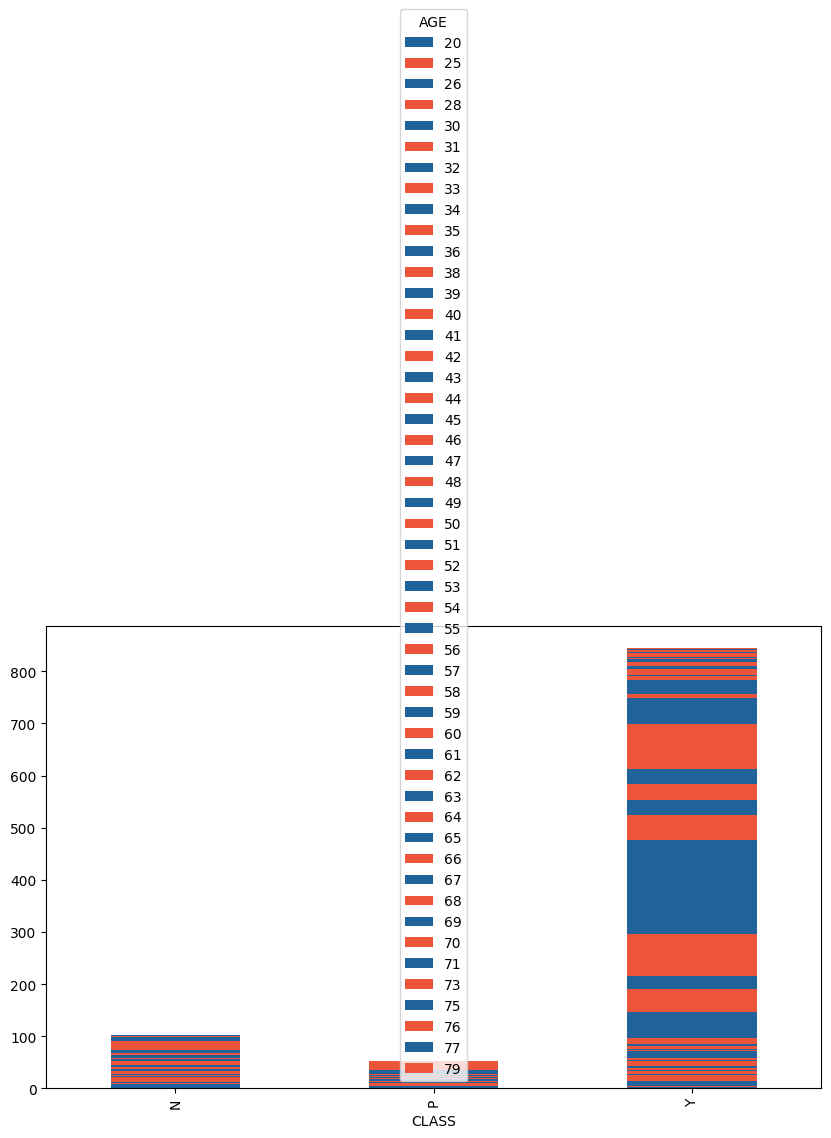

In [ ]:
class_age_counts = df.groupby(['CLASS', 'AGE']).size().unstack(fill_value=0)
plt.tight_layout()
plt.figure(figsize=(6, 4))
plt.legend(title='CLASS')
plt.legend('', frameon=False)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
class_age_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='CLASS'>

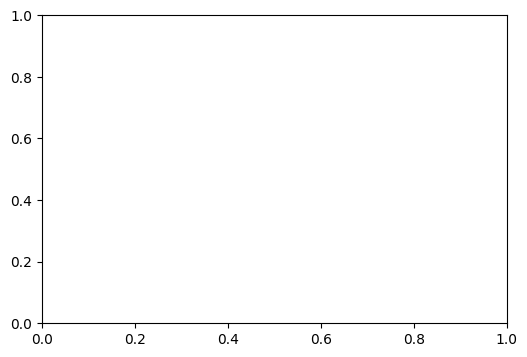

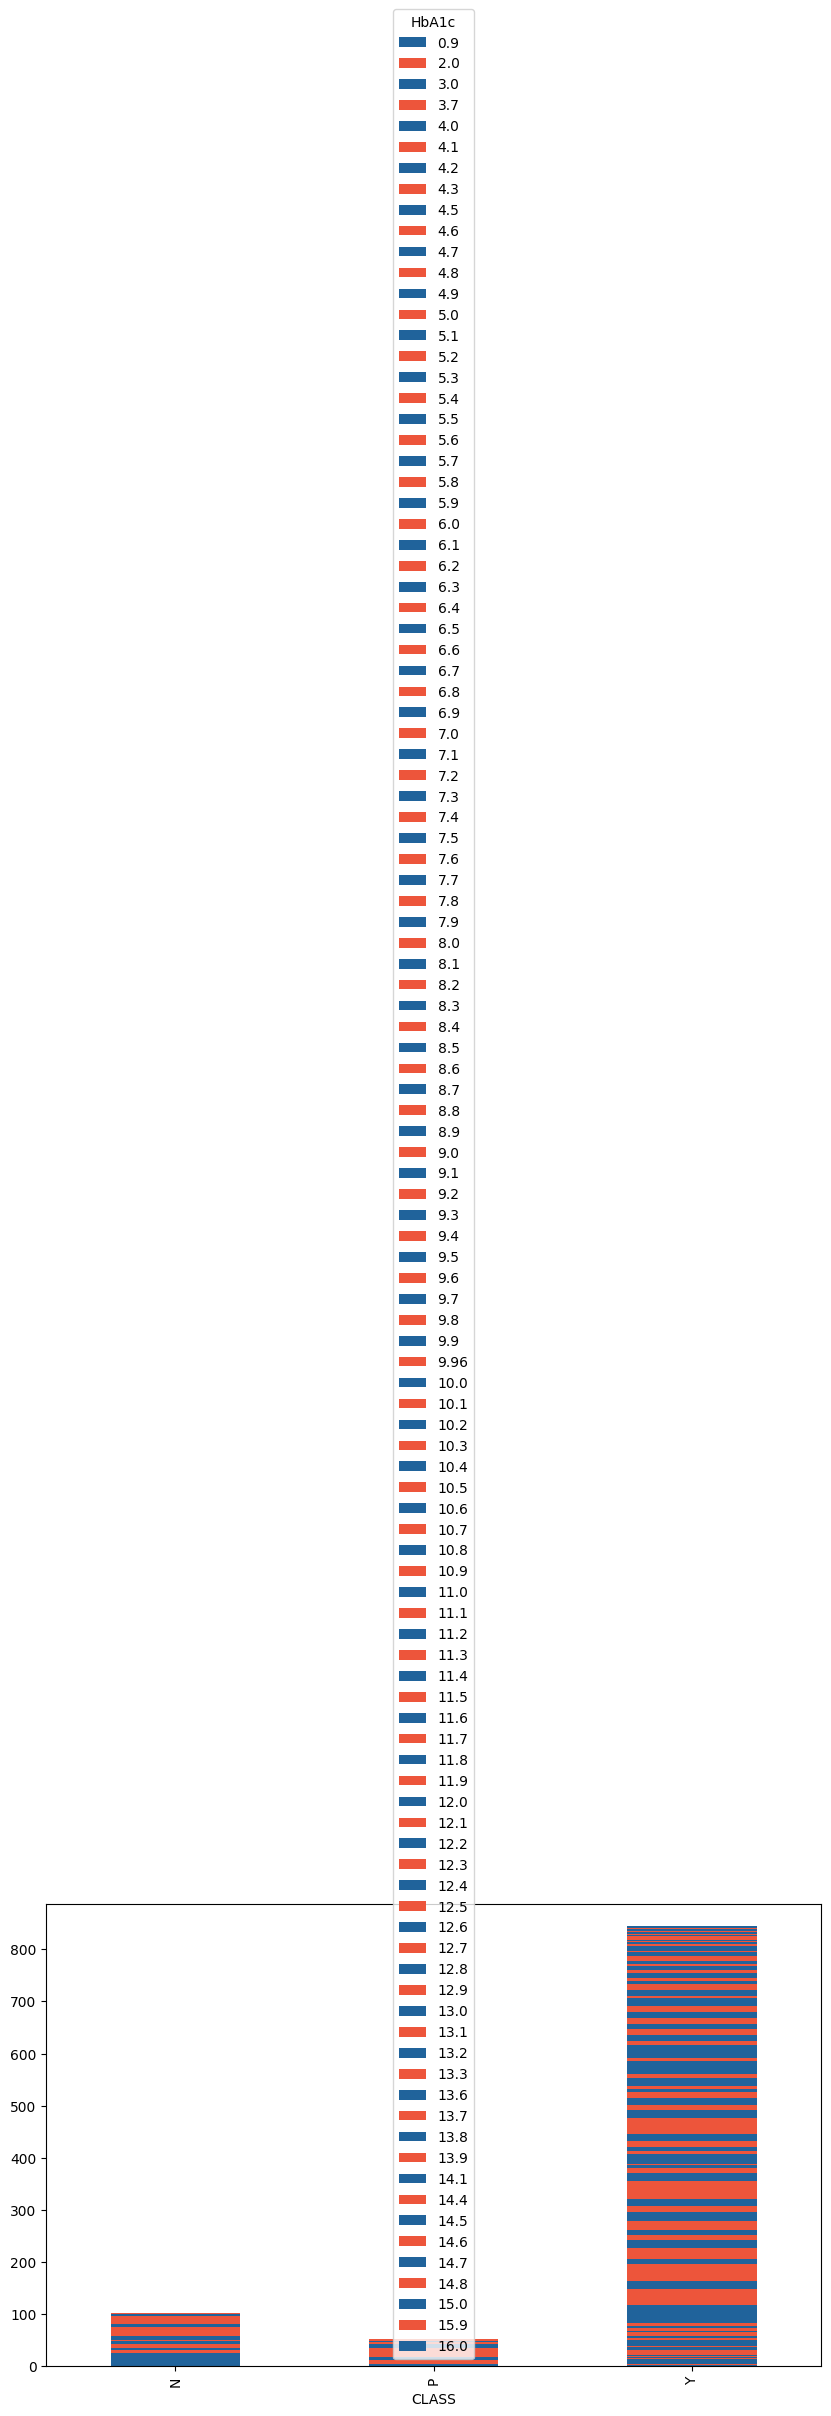

In [ ]:
class_hba1c_counts = df.groupby(['CLASS', 'HbA1c']).size().unstack(fill_value=0)
plt.figure(figsize=(6, 4))
plt.tight_layout()
plt.legend('', frameon=False)
class_hba1c_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


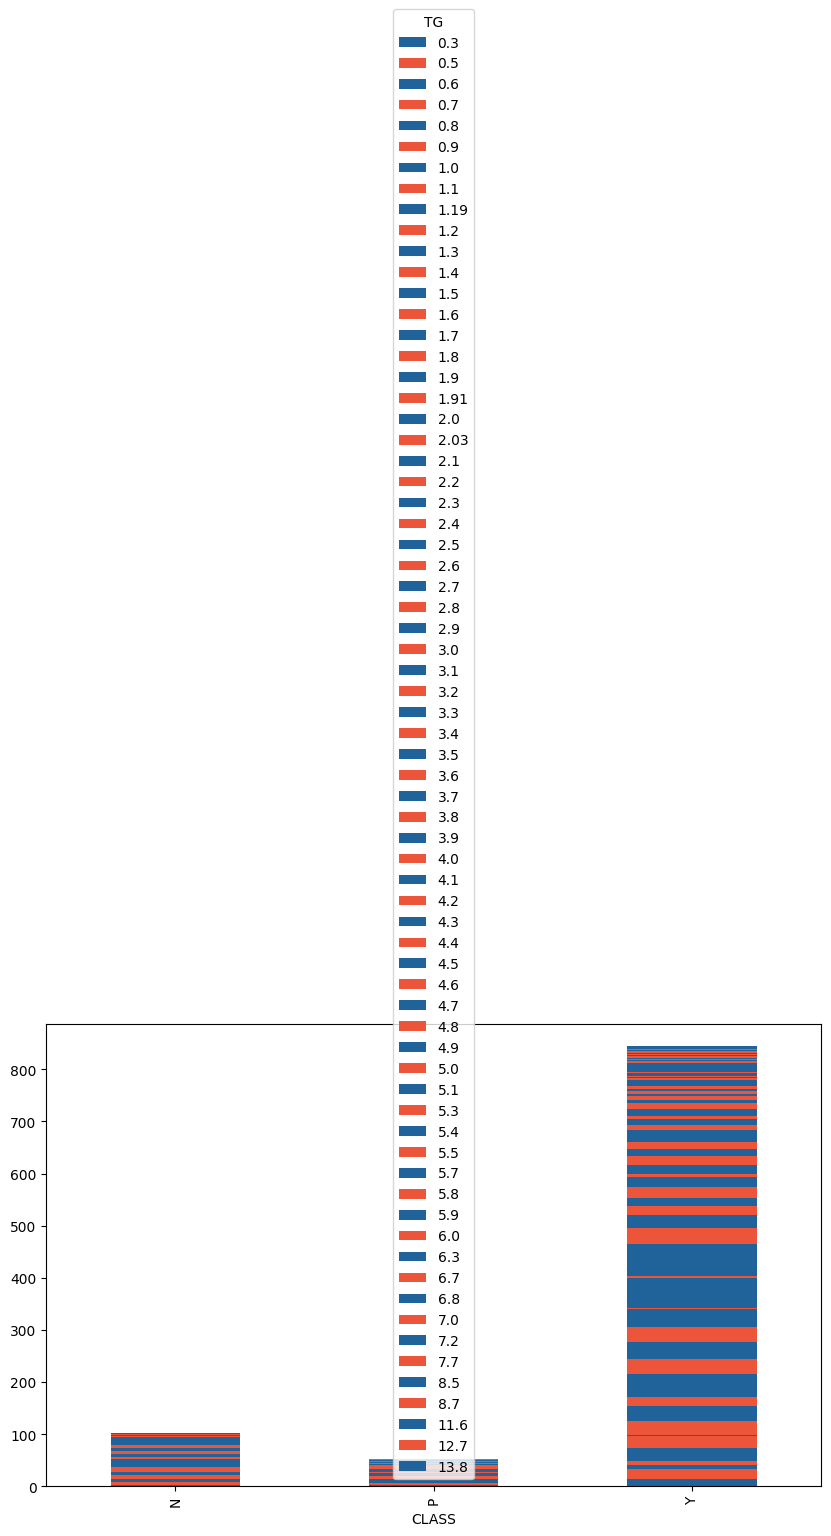

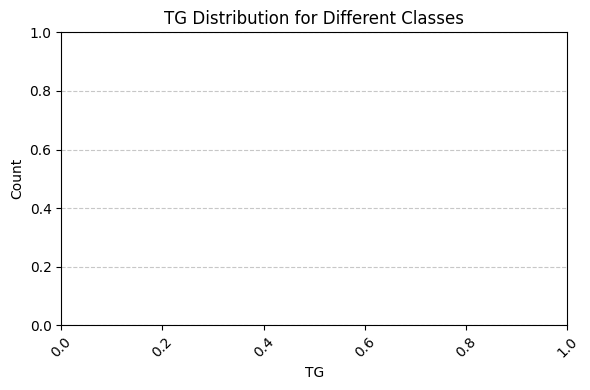

In [ ]:
class_hba1c_counts = df.groupby(['CLASS', 'TG']).size().unstack(fill_value=0)
class_hba1c_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.figure(figsize=(6, 4))
plt.title('TG Distribution for Different Classes')
plt.xlabel('TG')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CLASS')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend('', frameon=False)
plt.show()

# Scatter Plot of Age by Cholestrol for Different Class

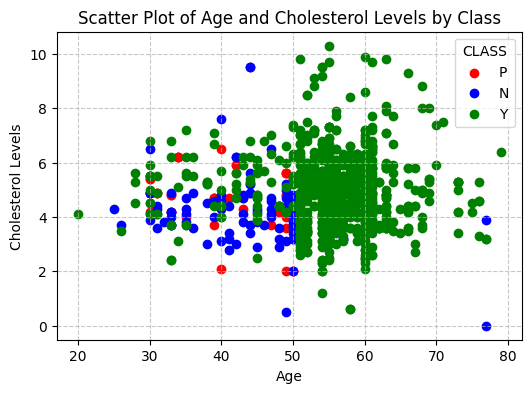

In [ ]:
colors = {'P': 'red', 'N': 'blue', 'Y': 'green'}

plt.figure(figsize=(6, 4))
for class_type in colors:
    class_df = df[df['CLASS'] == class_type]
    plt.scatter(class_df['AGE'], class_df['Chol'], color=colors[class_type], label=class_type)

plt.title('Scatter Plot of Age and Cholesterol Levels by Class')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.legend(title='CLASS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()